In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data = "mouse_drug.csv"
clinical_trial_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data)
clinical_df = pd.read_csv(clinical_trial_data)
# mouse_df
# clinical_df

# Combine the data into a single dataset
orig_merged_df = pd.merge(mouse_df, clinical_df, on= 'Mouse ID')
orig_merged_df

# Display the data table for preview


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Group Drug and Timepoint columns
drug_timepoint_group = orig_merged_df.groupby(["Drug","Timepoint"])

# Calculate Mean Tumor Volume & Convert to DataFrame
mean_tumor_volume = pd.DataFrame(drug_timepoint_group["Tumor Volume (mm3)"].mean())
mean_tumor_volume = mean_tumor_volume.reset_index()
mean_tumor_volume

# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_volume_sem = pd.DataFrame(drug_timepoint_group.sem()["Tumor Volume (mm3)"])
tumor_volume_sem = tumor_volume_sem.reset_index()
tumor_volume_sem

# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Formula for standard error as a whole

# volume_df = mean_tumor_volume.pivot_table(index= 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# volume_df= volume_df.reset_index()
# volume_df

# Standard Error per Drug as a whole
# volume_df.sem(axis = 0)

In [5]:
# Minor Data Munging to Re-Format the Data Frames 

volume_df = mean_tumor_volume.pivot_table(index= 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
volume_df= volume_df.reset_index()
volume_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


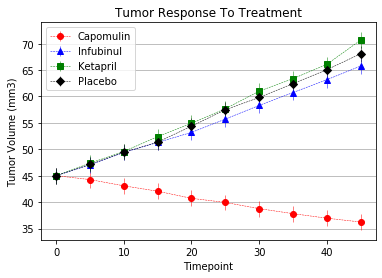

In [6]:
# Generate the Plot (with Error Bars)

yerr = 1.5

capomulin = plt.errorbar(volume_df.iloc[:,0],volume_df.iloc[:,1], yerr = yerr, 
                         fmt = 'ro--', linewidth = .5, label="Capomulin")
infubinul = plt.errorbar(volume_df.iloc[:,0],volume_df.iloc[:,3], yerr = yerr,
                     fmt = 'b--^', linewidth = .5, label= "Infubinul")
ketapril = plt.errorbar(volume_df.iloc[:,0],volume_df.iloc[:,4], yerr = yerr,
                    fmt ='g--s', linewidth = .5,label = "Ketapril")
placebo = plt.errorbar(volume_df.iloc[:,0],volume_df.iloc[:,6], yerr = yerr, 
                   fmt = 'k--D', linewidth = .5, label = "Placebo")
 

# # Add title, labels legend & grid lines
plt.title("Tumor Response To Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(["Capomulin", "Infubinul", "Ketapril", "Placebo"])
plt.grid(axis='y')


# Save the Figure
plt.savefig('tumor_volume_mean.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Calculate Mean Tumor Volume & Convert to DataFrame
mean_metastatic_sites = pd.DataFrame(drug_timepoint_group["Metastatic Sites"].mean())
mean_metastatic_sites
mean_metastatic_sites = mean_metastatic_sites.reset_index()
mean_metastatic_sites

# Preview DataFrame

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metastatic_sem = pd.DataFrame(drug_timepoint_group.sem()["Metastatic Sites"])
metastatic_sem = metastatic_sem.reset_index()
metastatic_sem

# Preview DataFrame

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [9]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_df = mean_metastatic_sites.pivot_table(index= 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
metastatic_df
metastatic_df= metastatic_df.reset_index()
metastatic_df

# Preview that Reformatting worked


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


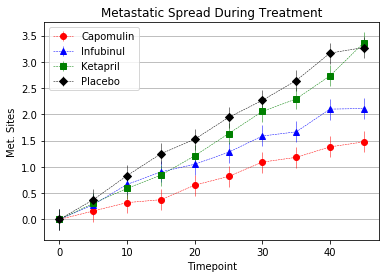

In [10]:
yerr = 0.2

# Generate the Plot (with Error Bars)
capomulin = plt.errorbar(metastatic_df.iloc[:,0],metastatic_df.iloc[:,1], yerr = yerr,
                     fmt = 'ro--', linewidth = .5, label="capomulin")
infubinul = plt.errorbar(metastatic_df.iloc[:,0],metastatic_df.iloc[:,3], yerr = yerr, 
                     fmt = 'b--^', linewidth = .5,label= "infubinul")
ketapril = plt.errorbar(metastatic_df.iloc[:,0],metastatic_df.iloc[:,4], yerr = yerr,
                    fmt = 'g--s', linewidth = .5, label = "ketapril")
placebo = plt.errorbar(metastatic_df.iloc[:,0],metastatic_df.iloc[:,6], yerr = yerr,
                   fmt = 'k--D', linewidth = .5, label = "placebo")

# Add title, labels legend & grid lines
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Met. Sites")
plt.legend(["Capomulin", "Infubinul", "Ketapril", "Placebo"])
plt.grid(axis='y')


# Save the Figure
plt.savefig('metastatic_mean.png')

# Show the Figure
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = pd.DataFrame(drug_timepoint_group["Mouse ID"].count())
mouse_count = mouse_count.reset_index()
mouse_count

# Preview DataFrame

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.pivot_table(index= 'Timepoint', columns = 'Drug', values = 'Mouse ID')
mouse_count
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


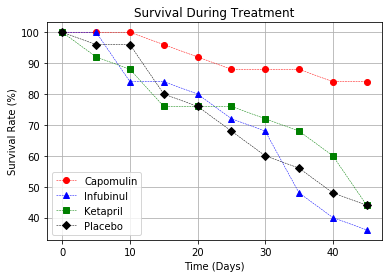

In [13]:
# Generate the Plot (Accounting for percentages)

# Calculate Mouse Count %
capomulin_pct = ((mouse_count["Capomulin"])/25)*100
infubinol_pct = ((mouse_count["Infubinol"])/25)*100
ketapril_pct = ((mouse_count["Ketapril"])/25)*100
placebo_pct = ((mouse_count["Placebo"])/25)*100

# Build Plot
plt.plot(capomulin_pct,'ro--', linewidth = .5)
plt.plot(infubinol_pct,'b--^', linewidth = .5)
plt.plot(ketapril_pct,'g--s', linewidth = .5)
plt.plot(placebo_pct,'k--D', linewidth = .5)

# Add title, labels legend & grid lines
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(["Capomulin", "Infubinul", "Ketapril", "Placebo"])
plt.grid(True)

# Save the Figure
plt.savefig('survival_rate.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
start_volume = (volume_df.iloc[0])
start_volume

end_volume = volume_df.iloc[-1]
end_volume

volume_pct_change = (end_volume-start_volume)/start_volume*100
# volume_pct_change

# Drop irrelevant rows
volume_pct_change = volume_pct_change.drop(['Timepoint', 'Ceftamin','Naftisol', 'Propriva',
                                           'Ramicane', 'Stelasyn', 'Zoniferol'])
volume_pct_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

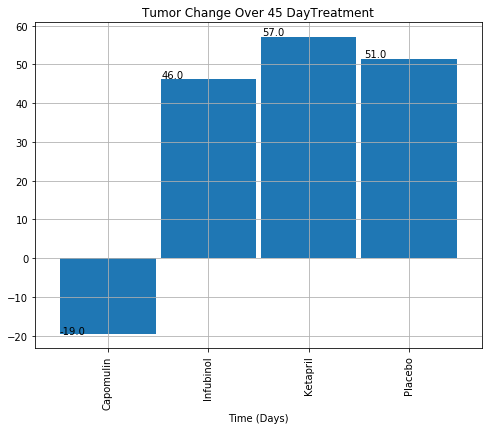

In [30]:
pct_change_chart = volume_pct_change.plot(kind="bar", figsize=(8,6),legend=False, width=0.95)

for p in pct_change_chart.patches:
    pct_change_chart.annotate(np.round(p.get_height(),decimals=0), (p.get_x() * 1.01, p.get_height() * 1.01))

# Add title, labels legend & grid lines
plt.title("Tumor Change Over 45 DayTreatment")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.show()